In [ ]:
!pip install dask[dataframe]
#!pip install cupy-cuda11x
!pip install dask[distributed]



In [ ]:
pip install dask_ml

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
#from google.colab import drive
#import cupy as cp
#import cudf
import dask
from dask_ml.preprocessing import Categorizer
import dask.dataframe as dd
import pickle  # To save mappings for decoding
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import dask.array as da
import dask.dataframe as dd
from dask_ml.preprocessing import LabelEncoder


In [2]:
file_path = "C:/Users/Himanshu/Downloads/concatenated_data.csv"

In [3]:
import dask.dataframe as dd

# Specify the dtype for the problematic column and the block size to control partitions
df = dd.read_csv(file_path, dtype={'CancellationCode': 'object'}, blocksize="64MB")  # Adjust blocksize as needed

# Check the first few rows
print(df.head())


   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2004      1          12          1    623.0         630    901.0   
1  2004      1          13          2    621.0         630    911.0   
2  2004      1          14          3    633.0         630    920.0   
3  2004      1          15          4    627.0         630    859.0   
4  2004      1          16          5    635.0         630    918.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0         915            UA        462  ...      7       11          0   
1         915            UA        462  ...     16       16          0   
2         915            UA        462  ...      4       15          0   
3         915            UA        462  ...      4       10          0   
4         915            UA        462  ...      3       13          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0               NaN         0             0            0   

In [ ]:
columns_list = list(df.columns)
print(columns_list)


['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


In [ ]:
# Automatically detect categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Categorizer to encode all categorical columns
categorizer = Categorizer()
df_encoded = categorizer.fit_transform(df)

# Check results
print(df_encoded.head())

   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2004      1          12          1    623.0         630    901.0   
1  2004      1          13          2    621.0         630    911.0   
2  2004      1          14          3    633.0         630    920.0   
3  2004      1          15          4    627.0         630    859.0   
4  2004      1          16          5    635.0         630    918.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0         915            UA        462  ...      7       11          0   
1         915            UA        462  ...     16       16          0   
2         915            UA        462  ...      4       15          0   
3         915            UA        462  ...      4       10          0   
4         915            UA        462  ...      3       13          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0               NaN         0             0            0   

In [ ]:
# Function to identify non-numeric columns and their unique value counts
def non_numeric_columns_with_unique_counts(dask_df):
    for column in dask_df.columns:
        print(f"Column: {column}")
        try:
            # Check if the column is numeric
            if not dask_df[column].dtype.kind in 'biufc':  # b: boolean, i: integer, u: unsigned, f: float, c: complex
                print(f"  Type: Non-numeric")
                unique_count = dask_df[column].nunique().compute()
                print(f"  Number of unique values: {unique_count}\n")
            else:
                print(f"  Type: Numeric\n")
        except Exception as e:
            print(f"  Error processing column {column}: {e}\n")

# Call the function
non_numeric_columns_with_unique_counts(df)

Column: Year
  Type: Numeric

Column: Month
  Type: Numeric

Column: DayofMonth
  Type: Numeric

Column: DayOfWeek
  Type: Numeric

Column: DepTime
  Type: Numeric

Column: CRSDepTime
  Type: Numeric

Column: ArrTime
  Type: Numeric

Column: CRSArrTime
  Type: Numeric

Column: UniqueCarrier
  Type: Non-numeric
  Number of unique values: 23

Column: FlightNum
  Type: Numeric

Column: TailNum
  Type: Non-numeric
  Number of unique values: 6925

Column: ActualElapsedTime
  Type: Numeric

Column: CRSElapsedTime
  Type: Numeric

Column: AirTime
  Type: Numeric

Column: ArrDelay
  Type: Numeric

Column: DepDelay
  Type: Numeric

Column: Origin
  Type: Non-numeric
  Number of unique values: 321

Column: Dest
  Type: Non-numeric
  Number of unique values: 327

Column: Distance
  Type: Numeric

Column: TaxiIn
  Type: Numeric

Column: TaxiOut
  Type: Numeric

Column: Cancelled
  Type: Numeric

Column: CancellationCode
  Type: Non-numeric
  Number of unique values: 4

Column: Diverted
  Type: Num

In [4]:
num_missing_values = df.isnull().sum().compute()


In [5]:
df = df.drop(columns=["CancellationCode"])

In [6]:
df = df.dropna()

In [7]:
num_missing_values = df.isnull().sum().compute()

In [8]:
print(num_missing_values)


Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


In [ ]:
print(len(df))

28259657


In [ ]:
print(df.columns)

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [ ]:
import dask.dataframe as dd
from sklearn.preprocessing import LabelEncoder

def encode_columns_to_numeric(dask_df, column_names):
    """
    Encodes multiple non-numeric columns in a Dask DataFrame to numeric values.

    Parameters:
        dask_df (dd.DataFrame): The Dask DataFrame containing the columns to be encoded.
        column_names (list of str): The names of the columns to encode.

    Returns:
        dd.DataFrame: A Dask DataFrame with the encoded columns.
    """
    for column_name in column_names:
        # Ensure the column is present
        if column_name not in dask_df.columns:
            raise ValueError(f"Column '{column_name}' not found in the DataFrame")

        # Compute unique values for the column
        unique_values = dask_df[column_name].drop_duplicates().compute()

        # Fit a LabelEncoder with the unique values
        label_encoder = LabelEncoder()
        label_encoder.fit(unique_values)

        # Create a mapping function
        mapping = {label: encoded for label, encoded in zip(unique_values, label_encoder.transform(unique_values))}

        # Apply the mapping function to the column
        dask_df[column_name] = dask_df[column_name].map(mapping).astype(int)

    return dask_df
# Encode multiple columns in the existing Dask DataFrame
df = encode_columns_to_numeric(df, ['UniqueCarrier', 'TailNum', 'Origin', 'Dest'])




In [ ]:
print(df.columns)

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [ ]:
df = df.drop(columns=["Cancelled", "Diverted", "UniqueCarrier_encoded", "DayofMonth", "Dest_encoded", "UniqueCarrier", "TailNum", "Origin", "Dest","CancellationCode", "AirTime", "ActualElapsedTime", "CRSElapsedTime", "FlightNum"])


In [ ]:
df = df.drop(columns = ["DayOfWeek"])

In [ ]:
df = df.drop(columns = ["Origin_encoded", "TailNum_encoded", "Month", "Distance", "Year"])

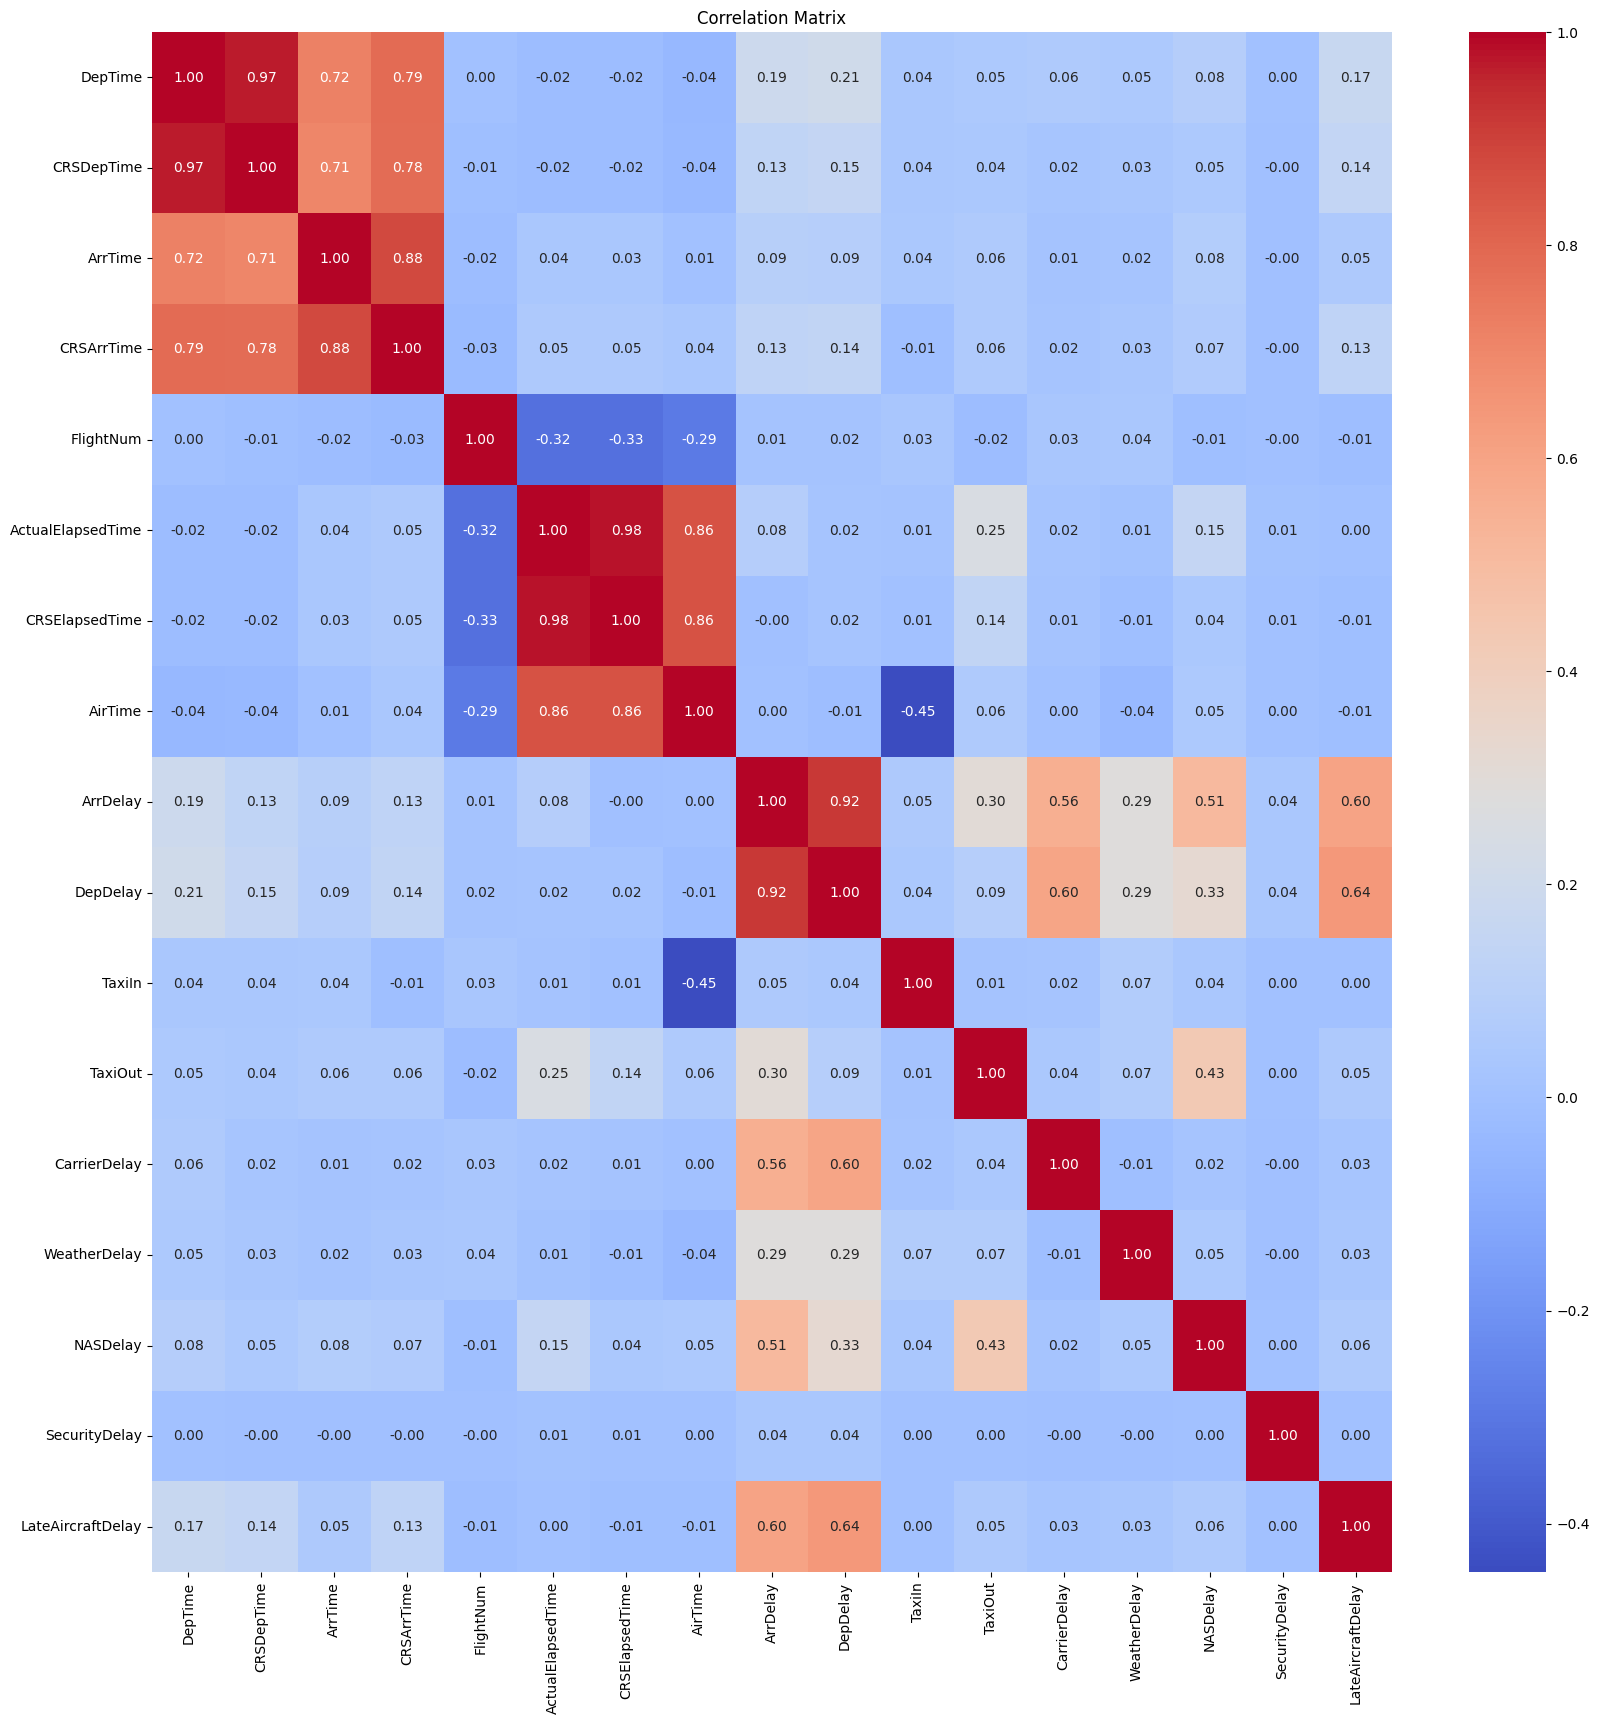

In [ ]:
# Compute the correlation matrix (convert to pandas DataFrame for visualization)
correlation_matrix = df.corr().compute()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
print(df.columns)

Index(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ArrDelay',
       'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [11]:
df = df.repartition(npartitions=1)  # Combine into a single partition



In [12]:
df.to_parquet('C:/Users/Himanshu/Downloads/output_file.parquet', write_index = False)
